<a href="https://colab.research.google.com/github/Miit-009/Jio-Institute/blob/main/Session_10_(12_Feb)_Surge_Pricing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

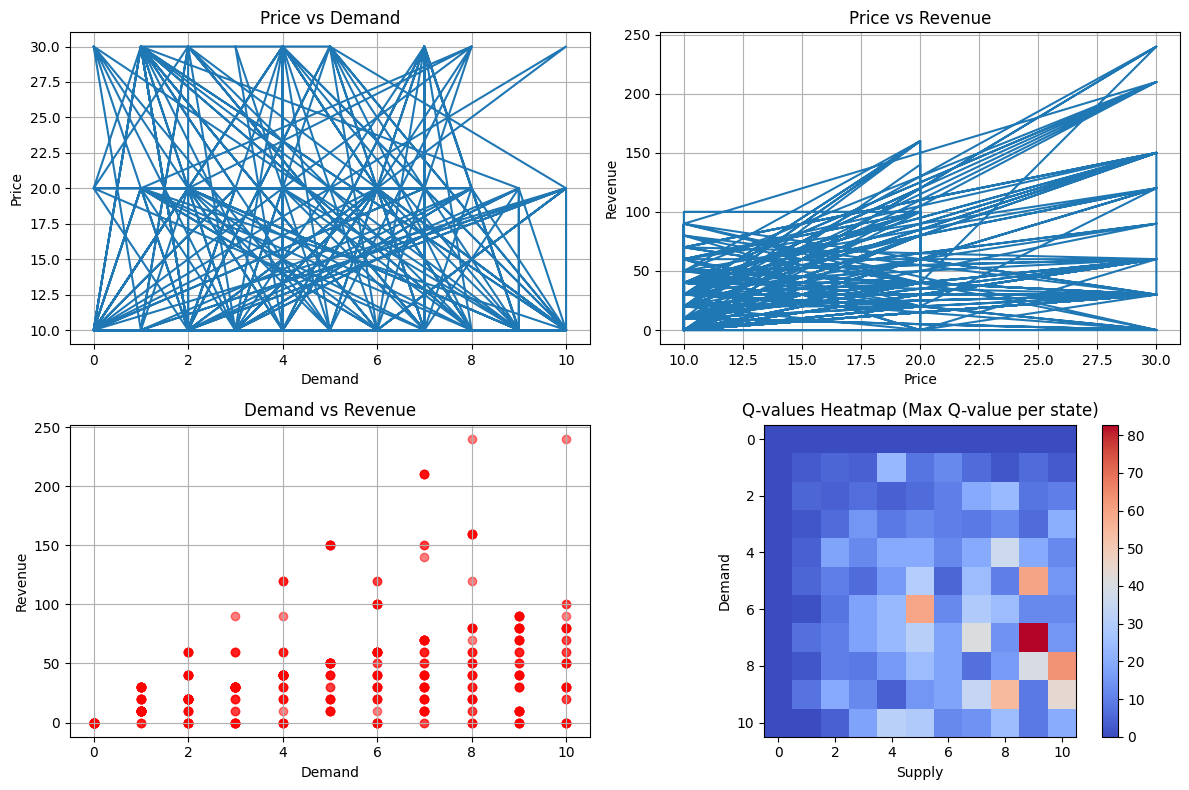

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parameters
base_fare = 10  # Base fare for a ride
max_surge = 3  # Maximum surge multiplier
min_surge = 1  # Minimum surge multiplier
num_steps = 500  # Number of time steps for simulation
n_actions = max_surge - min_surge + 1  # Number of actions (price multipliers)
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate

# Initialize Q-table
Q = np.zeros((11, 11, n_actions))  # 11 possible demand levels, 11 possible supply levels

# Simulated Environment
def get_simulated_demand_and_supply():
    # Demand and supply are generated randomly between 0 to 10 for simplicity
    demand = random.randint(0, 10)
    supply = random.randint(0, 10)
    return demand, supply

def get_price(surge_multiplier):
    return base_fare * surge_multiplier

def get_reward(demand, supply, price):
    # Revenue: min(demand, supply) * price, ensuring not more rides than available drivers
    rides = min(demand, supply)
    revenue = rides * price
    return revenue

# Training (Q-learning)
revenue_history = []
price_history = []
demand_history = []

for step in range(num_steps):
    # Simulate demand and supply
    demand, supply = get_simulated_demand_and_supply()

    # Select action (surge multiplier) using epsilon-greedy policy
    if random.uniform(0, 1) < epsilon:
        surge_multiplier = random.randint(min_surge, max_surge)  # Exploration
    else:
        surge_multiplier = np.argmax(Q[demand, supply]) + min_surge  # Exploitation

    # Get price and reward
    price = get_price(surge_multiplier)
    reward = get_reward(demand, supply, price)

    # Update Q-value using Q-learning update rule
    next_state = [demand, supply]
    best_next_action = np.argmax(Q[demand, supply])
    Q[demand, supply, surge_multiplier - min_surge] = (1 - alpha) * Q[demand, supply, surge_multiplier - min_surge] + alpha * (reward + gamma * Q[next_state[0], next_state[1], best_next_action])

    # Store the history for visualization
    revenue_history.append(reward)
    price_history.append(price)
    demand_history.append(demand)

# Visualizations
plt.figure(figsize=(12, 8))

# Plot demand vs price
plt.subplot(2, 2, 1)
plt.plot(demand_history, price_history, label="Price vs Demand")
plt.xlabel('Demand')
plt.ylabel('Price')
plt.title('Price vs Demand')
plt.grid(True)

# Plot price vs revenue
plt.subplot(2, 2, 2)
plt.plot(price_history, revenue_history, label="Price vs Revenue")
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.title('Price vs Revenue')
plt.grid(True)

# Plot demand vs revenue
plt.subplot(2, 2, 3)
plt.scatter(demand_history, revenue_history, label="Demand vs Revenue", c='r', alpha=0.5)
plt.xlabel('Demand')
plt.ylabel('Revenue')
plt.title('Demand vs Revenue')
plt.grid(True)

# Plot Q-values heatmap (State-action values)
plt.subplot(2, 2, 4)
plt.imshow(np.max(Q, axis=2), cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Q-values Heatmap (Max Q-value per state)')
plt.xlabel('Supply')
plt.ylabel('Demand')

plt.tight_layout()
plt.show()



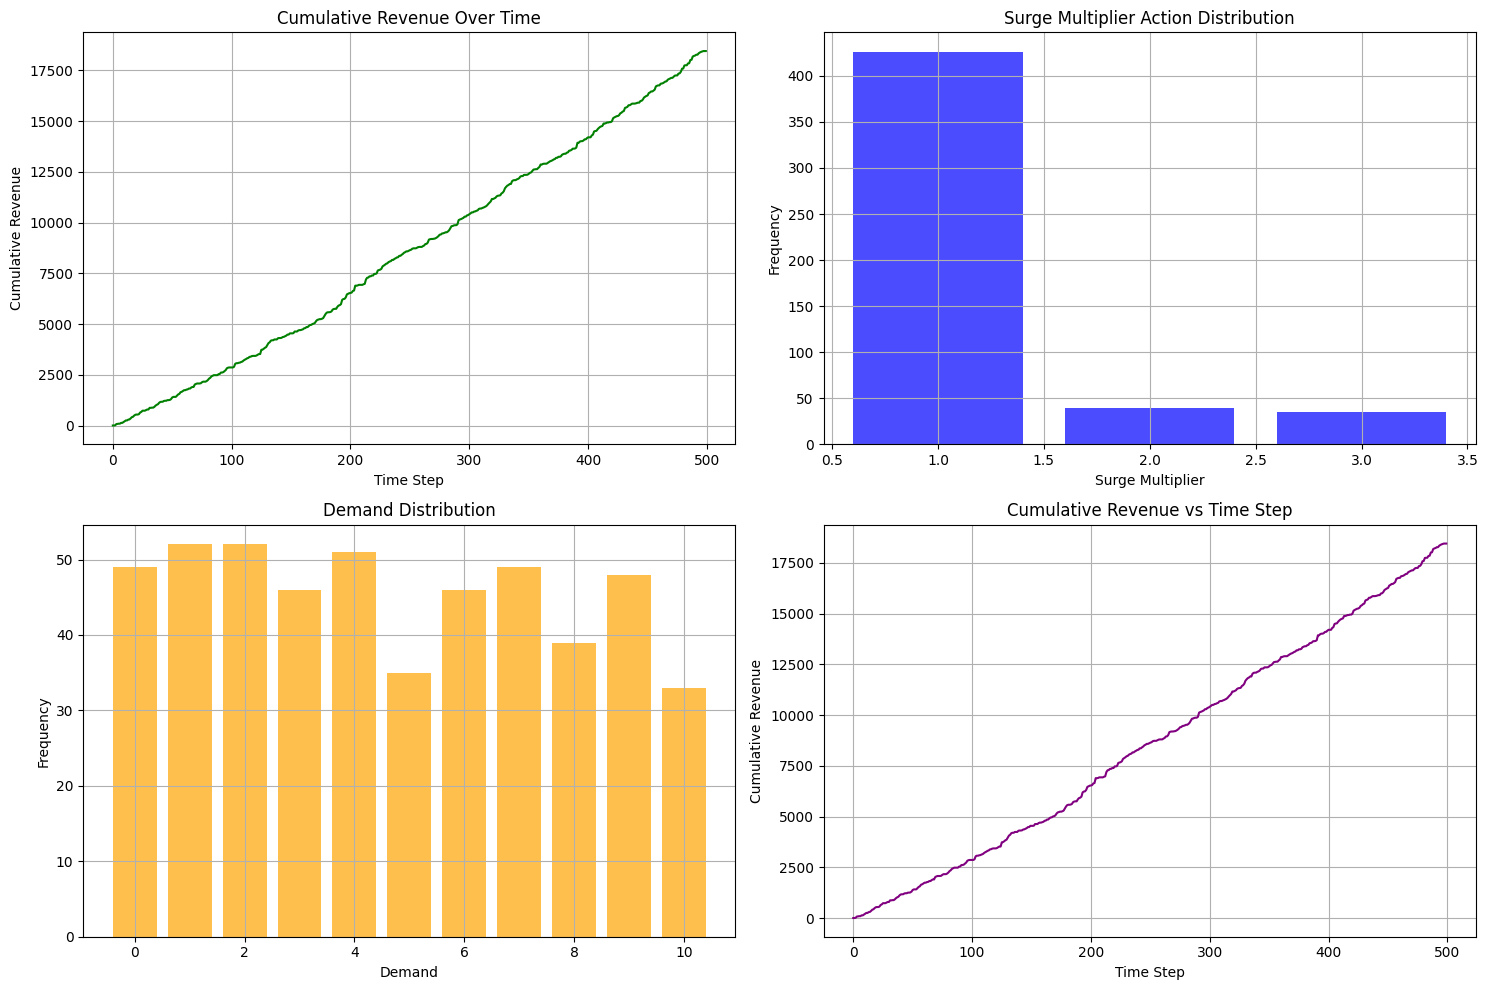

In [8]:
# Corrected code for Surge multiplier action distribution

# Surge multiplier action distribution should use demand and supply history, not price history
surge_multipliers_chosen = [min_surge + np.argmax(Q[d, s]) for d, s in zip(demand_history, demand_history)] # Use demand_history and supply
surge_multiplier_dist = [surge_multipliers_chosen.count(i) for i in range(min_surge, max_surge + 1)]

# Demand and Supply Distribution (Histograms)
demand_dist = [demand_history.count(i) for i in range(11)]
supply_dist = [price_history.count(i) for i in range(11)]

# Cumulative Revenue vs Time Step
cumulative_revenue_vs_time = np.cumsum(revenue_history)

plt.figure(figsize=(15, 10))

# Cumulative Revenue over Time
plt.subplot(2, 2, 1)
plt.plot(cumulative_revenue, label="Cumulative Revenue", color='green')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Revenue')
plt.title('Cumulative Revenue Over Time')
plt.grid(True)

# Surge Multiplier Action Distribution
plt.subplot(2, 2, 2)
plt.bar(range(min_surge, max_surge + 1), surge_multiplier_dist, color='blue', alpha=0.7)
plt.xlabel('Surge Multiplier')
plt.ylabel('Frequency')
plt.title('Surge Multiplier Action Distribution')
plt.grid(True)

# Demand Distribution
plt.subplot(2, 2, 3)
plt.bar(range(11), demand_dist, color='orange', alpha=0.7)
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.title('Demand Distribution')
plt.grid(True)

# Cumulative Revenue vs Time Step
plt.subplot(2, 2, 4)
plt.plot(cumulative_revenue_vs_time, label="Cumulative Revenue vs Time", color='purple')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Revenue')
plt.title('Cumulative Revenue vs Time Step')
plt.grid(True)

plt.tight_layout()
plt.show()
